## Notebook used to explore the data

In [2]:
import numpy as np
import astropy as ap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import sys

from astropy.table import QTable
import astropy.units as u

import read_mist_models

### Isochrones

In [3]:
with open("data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt", 'r') as f:
    lines = f.readlines()

print(len(lines))

for i in range(0, 500, 1):
    print(lines[i])


104530
# MIST version number  = 1.2     

# MESA revision number =     7503

# --------------------------------------------------------------------------------------

#  Yinit        Zinit   [Fe/H]   [a/Fe]  v/vcrit                                        

# 0.2703  1.42857E-02     0.00     0.00     0.00

# --------------------------------------------------------------------------------------

# number of isochrones =   107

# --------------------------------------------------------------------------------------

# number of EEPs, cols =   271   25

#   1                               2                               3                               4                               5                               6                               7                               8                               9                              10                              11                              12                              13                              14                       

l'âge de l'isochrone commence à 100 000 ans et augmente de ~12 000 ans à chaque incrément jusqu'à atteindre 1.99526e+10 ans (19.9526 milliards d'années)

le nombre de EEP (equivalent evolutionary point) tracks par isochrone augmente à chaque incrément du log10 de l'âge, pourquoi?


### Données intéressantes

- dans nom du fichier : [Fe/H] => la métallicité (le paramètre qui change entre tous les fichiers, de +0.50 à -4.00)
- colonne 2 : log10_isochrone_age_yr => âge de l'isochrone en log années
- (colonne 4 : star_mass => masse de l'étoile en masse solaire (masse juqu'à 3-5 nous intéresse))
- (colonne 8 : log_L => log luminosité bolométrique en luminosité solaire)
- colonne 11 : log_Teff => log température effective en Kelvin
- colonne 13 : log_g => log gravité de surface en cm*s<sup>-2</sup>
- (colonne 25 : phase => le type de phase de l'étoile défini par : -1=PMS, 0=MS, 2=RGB, 3=CHeB, 4=EAGB, 5=TPAGB, 6=postAGB, 9=WR)

In [4]:
iso_test = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_basic.txt')

infos = iso_test.read_iso_file()

# for data in infos:
#     print(data)

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_basic.txt


### Looking at the isochrones

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_basic.txt
[3.49658903 3.49668886 3.49822443 ... 4.7017784  4.69415116 4.68655345]


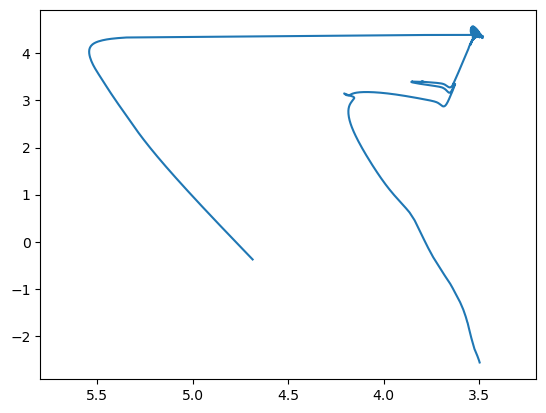

In [5]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_basic.txt')

age_ind = iso.age_index(8.0)

logTeff = iso.isos[age_ind]['log_Teff']
print(logTeff)

logL = iso.isos[age_ind]['log_L']

plt.xlim(5.8, 3.2)
plt.plot(logTeff, logL)

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


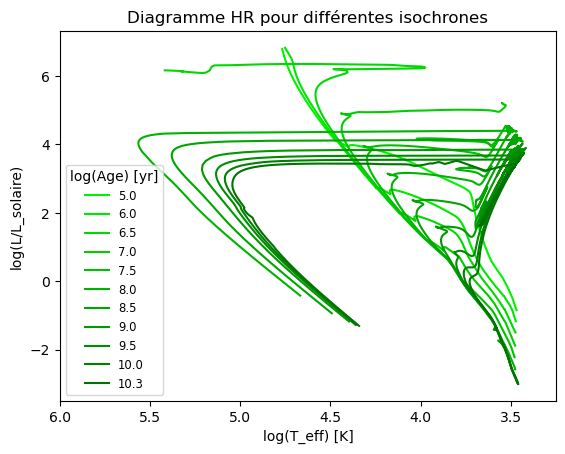

In [6]:
# V1 sans pandas

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    # print(age_ind) # donne un index d'isochrone
    # print(iso.isos[age_ind]) # donne une liste de tous les paramètres de toutes les étoiles dans l'isochrone
    # print(iso.isos[age_ind]['log_Teff']) # donne une liste de la température de toutes les étoiles dans l'isochrone
    # break
    
    logL = iso.isos[age_ind]['log_L']

    plt.plot(logTeff, logL, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))

plt.xlim(6, 3.25)
plt.xlabel("log(T_eff) [K]")
plt.ylabel("log(L/L_solaire)")
plt.legend(title="log(Age) [yr]", fontsize="small")
plt.title("Diagramme HR pour différentes isochrones")
plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


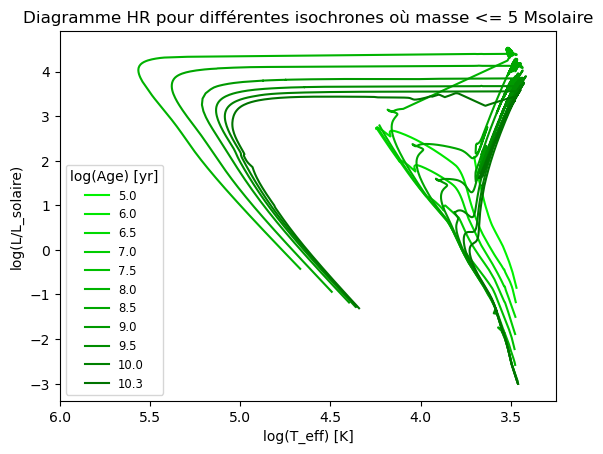

In [7]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    
    mass_mask = []
    for mass in iso.isos[age_ind]['star_mass']:
        if mass <= 5:
            mass_mask.append(True)
        else:
            mass_mask.append(False)
    mass_mask = np.array(mass_mask)

    logTeff = iso.isos[age_ind]['log_Teff']
    logTeff = logTeff[mass_mask]
    
    logL = iso.isos[age_ind]['log_L']
    logL = logL[mass_mask]

    plt.plot(logTeff, logL, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))

plt.xlim(6, 3.25)
plt.xlabel("log(T_eff) [K]")
plt.ylabel("log(L/L_solaire)")
plt.legend(title="log(Age) [yr]", fontsize="small")
plt.title("Diagramme HR pour différentes isochrones où masse <= 5 Msolaire")
plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


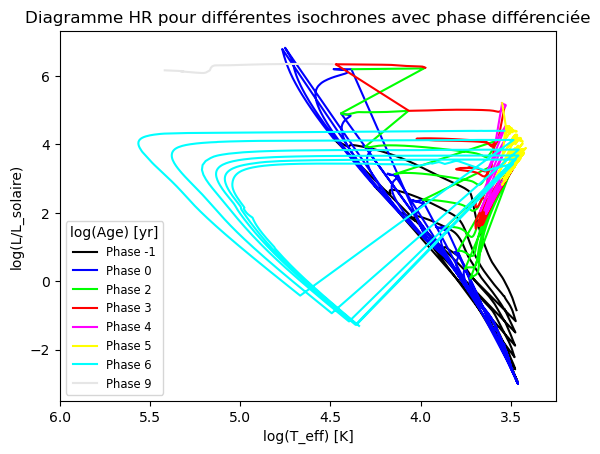

In [8]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

# initialisation du dictionnaire pour les couleurs des phases
plot_dict = dict() # -1, 0, 2, 3, 4, 5, 6, 9
plot_dict[-1] = [(0, 0, 0), [], []]
plot_dict[0] = [(0, 0, 1), [], []]
plot_dict[2] = [(0, 1, 0), [], []]
plot_dict[3] = [(1, 0, 0), [], []]
plot_dict[4] = [(1, 0, 1), [], []]
plot_dict[5] = [(1, 1, 0), [], []]
plot_dict[6] = [(0, 1, 1), [], []]
plot_dict[9] = [(0.9, 0.9, 0.9), [], []]

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    for j, phase in enumerate(phase_list):
        plot_dict[phase][1].append(logTeff[j])
        plot_dict[phase][2].append(logL[j])

for key in plot_dict.keys():
    plt.plot(plot_dict[key][1], plot_dict[key][2], label=f"Phase {key}", c=plot_dict[key][0])

plt.xlim(6, 3.25)
plt.xlabel("log(T_eff) [K]")
plt.ylabel("log(L/L_solaire)")
plt.legend(title="log(Age) [yr]", fontsize="small")
plt.title("Diagramme HR pour différentes isochrones avec phase différenciée")
plt.show()

In [9]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection


def colored_line(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified along the line by a third value.

    It does this by creating a collection of line segments. Each line segment is
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should be the same size as x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Default the capstyle to butt so that the line segments smoothly line up
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # Compute the midpoints of the line segments. Include the first and last points
    # twice so we don't need any special syntax later to handle them.
    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    # Determine the start, middle, and end coordinate pair of each line segment.
    # Use the reshape to add an extra dimension so each pair of points is in its
    # own list. Then concatenate them to create:
    # [
    #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
    #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
    #   ...
    # ]
    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, **default_kwargs)
    lc.set_array(c)  # set the colors of each segment
    
    return ax.add_collection(lc)


Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


C:\Users\antoi\AppData\Local\Temp\ipykernel_27092\90636423.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(title="log(Age) [yr]", fontsize="small")


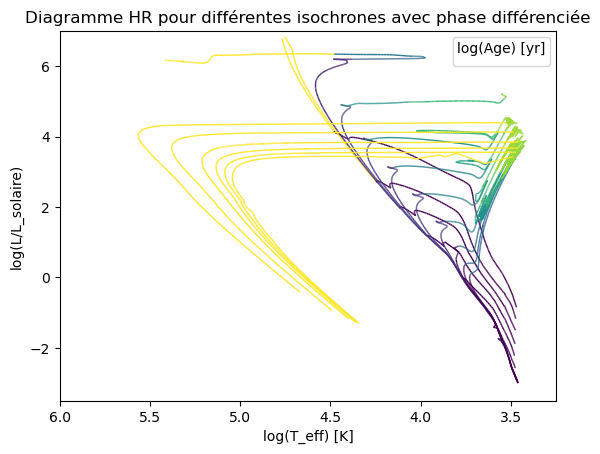

In [10]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

fig1, ax1 = plt.subplots()

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    
    lines = colored_line(logTeff, logL, phase_list, ax1, linewidth=1)

ax1.set_xlim(6, 3.25)
ax1.set_ylim(-3.5, 7)
ax1.set_xlabel("log(T_eff) [K]")
ax1.set_ylabel("log(L/L_solaire)")
ax1.legend(title="log(Age) [yr]", fontsize="small")
ax1.set_title("Diagramme HR pour différentes isochrones avec phase différenciée")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


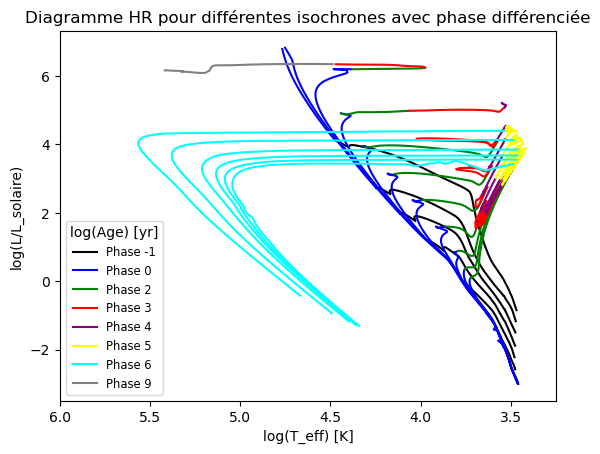

In [ ]:
import matplotlib.lines as mlines

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

c_dict = {-1 : "black", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"} # TODO enlever phase -1 pour clarté

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(6, 3.25)
plt.xlabel("log(T_eff) [K]")
plt.ylabel("log(L/L_solaire)")
plt.legend(title="log(Age) [yr]", fontsize="small", handles = [mlines.Line2D([], [], color=c_dict[key], label=f"Phase {key}") for key in c_dict.keys()])
plt.title("Diagramme HR pour différentes isochrones avec phase différenciée")
plt.show()

#### Mettre les données dans les tables

In [12]:
# exemple

a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5]
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = QTable([a, b, c, d],
           names=('a', 'b', 'c', 'd'),
           meta={'name': 'first table'})

t.info
print(t)

 a   b   c    d  
            m / s
--- --- --- -----
  1 2.0   x  10.0
  4 5.0   y  20.0
  5 8.5   z  30.0


In [13]:
# création de une table par age
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

isos_data = []
for iso_ind in range(len(iso.isos)):
    logTeff = iso.isos[iso_ind]['log_Teff']
    logL = iso.isos[iso_ind]['log_L']
    log_g = iso.isos[iso_ind]['log_g']
    t = QTable([logTeff, logL, log_g],
           names=('logTeff', 'logL', 'log_g'),
           meta={'name': f"iso age {iso.isos[age_ind]['log10_isochrone_age_yr'][0]}"})
    isos_data.append(t.copy())

print(isos_data[0])

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt
     logTeff               logL              log_g       
------------------ ------------------- ------------------
3.4685410950939577 -0.8496952161361735  3.116651462997313
 3.469176422523654 -0.8396429021164937   3.11404210672383
3.4711160413528623 -0.8089438206169329 3.1061332305144638
3.4730352483724785 -0.7785635954667783 3.0984168687617104
 3.474944293275982 -0.7483679008494489 3.0908753040092383
3.4768367646597858 -0.7184353117899261 3.0835244726266504
 3.478709566027834 -0.6888117970457147 3.0763774543169644
 3.480566492429194 -0.6594253968508426  3.069404489127999
 3.482408695407301 -0.6302573711407673 3.0626116125825877
 3.484230014089774 -0.6013636407419086 3.0559923061288554
               ...                 ...                ...
4.7402734345513435   6.316050211478551 4.1624359200071375
 4.741872006393486   6.338894609254394  4.160661006297343
 4.746095902183563  6.40151258420

In [14]:
# création d'une table avec tout
def get_iso_data_panda(file):
    iso = read_mist_models.ISO(file)

    age = []
    logTeff = []
    logL = []
    log_g = []
    for iso_ind in range(len(iso.isos)):
        age.extend(iso.isos[iso_ind]['log10_isochrone_age_yr'])
        logTeff.extend(iso.isos[iso_ind]['log_Teff'])
        logL.extend(iso.isos[iso_ind]['log_L'])
        log_g.extend(iso.isos[iso_ind]['log_g'])

    iso_data_all = QTable([age, logTeff, logL, log_g],
                        names=('age', 'logTeff', 'logL', 'log_g'),
                        meta={'name': "iso data"})
    # print(iso_data_all.info)
    # print(iso_data_all)
    # display(iso_data_all.to_pandas())
    return iso_data_all.to_pandas()

In [15]:
# V2 avec pandas => pas intéressant

iso_data = get_iso_data_panda('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

print(iso_data.age.unique())

print(iso_data.loc[iso_data['age'] == 5.15])

sys.exit(1)

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    plt.plot(logTeff, logL, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))

plt.xlim(6, 3.25)
plt.xlabel("log(T_eff) [K]")
plt.ylabel("log(L/L_solaire)")
plt.legend(title="log(Age) [yr]", fontsize="small")
plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt
[ 5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35  5.4   5.45  5.5   5.55
  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95  6.    6.05  6.1   6.15
  6.2   6.25  6.3   6.35  6.4   6.45  6.5   6.55  6.6   6.65  6.7   6.75
  6.8   6.85  6.9   6.95  7.    7.05  7.1   7.15  7.2   7.25  7.3   7.35
  7.4   7.45  7.5   7.55  7.6   7.65  7.7   7.75  7.8   7.85  7.9   7.95
  8.    8.05  8.1   8.15  8.2   8.25  8.3   8.35  8.4   8.45  8.5   8.55
  8.6   8.65  8.7   8.75  8.8   8.85  8.9   8.95  9.    9.05  9.1   9.15
  9.2   9.25  9.3   9.35  9.4   9.45  9.5   9.55  9.6   9.65  9.7   9.75
  9.8   9.85  9.9   9.95 10.   10.05 10.1  10.15 10.2  10.25 10.3 ]
       age   logTeff      logL     log_g
816   5.15  3.469250 -0.895256  3.165046
817   5.15  3.470837 -0.870787  3.159459
818   5.15  3.472713 -0.841818  3.152934
819   5.15  3.474571 -0.813118  3.146594
820   5.15  3.476409 -0.784700  3.140447
...  

SystemExit: 1

c:\Users\antoi\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
# V3 avec choix des colonnes
def get_iso_data_panda_dict(file, col_names):
    iso = read_mist_models.ISO(file)

    col_dict = {key: [] for key in col_names}

    for iso_ind in range(len(iso.isos)):
        for keys in col_dict.keys():
            col_dict[keys].extend(iso.isos[iso_ind][keys])

    return pd.DataFrame.from_dict(col_dict)

In [62]:
df = get_iso_data_panda_dict('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt', ["log10_isochrone_age_yr", "log_Teff", "log_L", "log_g", "star_mass", "phase"])

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt
{'log10_isochrone_age_yr': [], 'log_Teff': [], 'log_L': [], 'log_g': [], 'star_mass': [], 'phase': []}


In [63]:
display(df)

,log10_isochrone_age_yr,log_Teff,log_L,log_g,star_mass,phase
0,5.0,3.468541,-0.849695,3.116651,0.100000,-1.0
1,5.0,3.469176,-0.839643,3.114042,0.101392,-1.0
2,5.0,3.471116,-0.808944,3.106133,0.105660,-1.0
3,5.0,3.473035,-0.778564,3.098417,0.109915,-1.0
4,5.0,3.474944,-0.748368,3.090875,0.114180,-1.0
...,...,...,...,...,...,...
103984,10.3,4.370643,-1.180793,7.779334,0.528715,6.0
103985,10.3,4.363336,-1.212858,7.782175,0.528717,6.0
103986,10.3,4.356026,-1.244886,7.784962,0.528720,6.0
103987,10.3,4.348711,-1.276875,7.787695,0.528724,6.0


#### Matrice de covariance

In [18]:
col_names = ["log10_isochrone_age_yr", "initial_mass", "star_mass", "star_mdot", "he_core_mass", "c_core_mass", "log_L", 
             "log_LH", "log_LHe", "log_Teff", "log_R", "log_g", "surface_h1", "surface_he3", "surface_he4", "surface_c12",
             "surface_o16", "log_center_T", "log_center_Rho", "center_gamma", "center_h1", "center_he4", "center_c12", "phase"]

iso_df = get_iso_data_panda_dict('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt', col_names)

cov_mat = np.cov(np.transpose(iso_df), bias=True)

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


In [22]:
for i in range(len(cov_mat)):
    cov_mat[i][i] = 0

<Axes: >

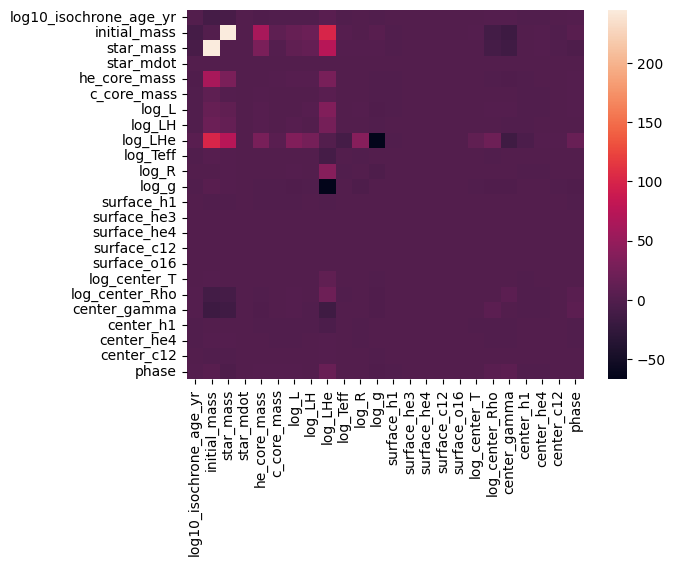

In [23]:
sns.heatmap(cov_mat, annot=False, fmt='g', xticklabels=col_names, yticklabels=col_names)

### Evolutionary tracks

faire le graphe avec d'autres couleurs pour les phases

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt
107
0
0
0
0
0
0
0
0
0
0
0


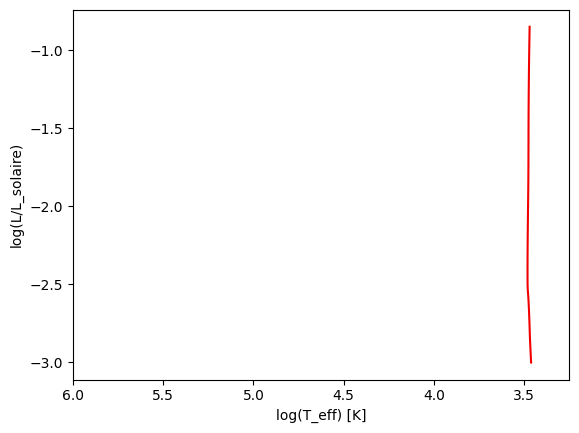

In [90]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

masses = [0.1, 0.4, 0.8, 1.5, 2.4, 4.0, 8.0, 16.0, 30.0, 60.0, 100.0, 250.0]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.6]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, mass in enumerate(masses):
    logTeff = []
    logL = []
    for iso_ind in range(len(iso.isos)):
        for data in iso.isos[iso_ind]:
            if data["initial_mass"] == mass:
                logTeff.append(data["log_Teff"])
                logL.append(data["log_L"])

    # age_ind = iso.age_index(age)
    # logTeff = iso.isos[age_ind]['log_Teff']

    # logL = iso.isos[age_ind]['log_L']

    plt.plot(logTeff, logL, label=f"{age}", c=(1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))
    print(len(logTeff))
    #print(len(logL))

plt.xlim(6, 3.25)
plt.xlabel("log(T_eff) [K]")
plt.ylabel("log(L/L_solaire)")
# plt.legend(title="log(Age) [yr]", fontsize="small")
plt.show()

Reading in: data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00010M.track.eep


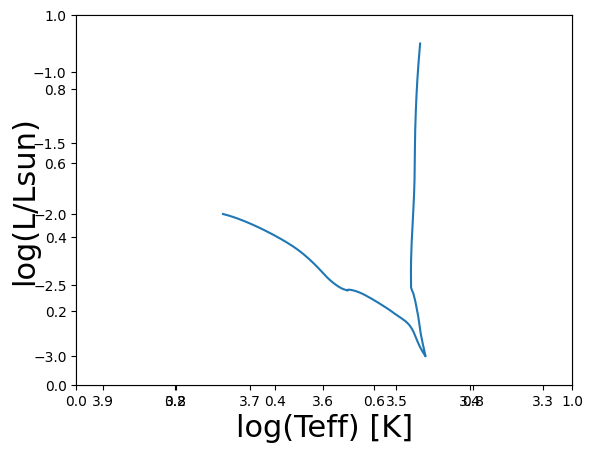

In [ ]:
masses = [0.1, 0.4, 0.8, 1.5, 2.4, 4.0, 8.0, 16.0, 30.0, 60.0, 100.0, 250.0]
masses_str = ["00010", "00040", "00080", "00150", "00240", "00400", "00800", "01600", "03000", "06000", "10000", "25000"]

for i, mass in enumerate(masses):
    track = read_mist_models.EEP('data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00010M.track.eep')

track.plot_HR()